# Performing Data Cleansing for Machine Learning Model

by Muhammad Alvendra Ihza

### Import library and dataset

In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 50

In [2]:
#import dataset
df_load = pd.read_csv(r'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv')

In [3]:
#display the number of rows and columns
df_load.shape

(7113, 22)

In [4]:
#display top 5 data
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#The number of unique ID
df_load.customerID.nunique()

7017

## Validating the Customer ID Number

### Filtering Customer ID Number with Specific Format
Search the correct customer ID number format (phone number), with the following criteria:
- The length of a character is 11-12.
- Consists of Numbers Only.
- The first 2 digits of customerID is 45

In [6]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id',axis = 1)
print('The number of filtered Customer ID is', df_load['customerID'].count())

The number of filtered Customer ID is 7006


### Filtering Duplicate Customer ID Number
Ensure that there are no duplicate ID. The type of duplication is:
- Duplication due to inserting exceeds once with the same value for every column
- Duplication due to inserting different data collection periods

In [7]:
# Drop Duplicate Rows
df_load.drop_duplicates()
# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
print('The number of distinct customer ID is',df_load['customerID'].count())

The number of distinct customer ID is 6993


### Summary

The validity of the customer ID number is very necessary to ensure that the data we have collected is correct. Based on these results, there are differences in the number of ID numbers from the first data loaded up to the final results. The number of data rows when first loaded was 7113 rows and 22 columns with 7017 unique ID. Then after checking the validity of the customer ID, there are only 6993 rows of data left.

## Handling Missing Values
### Handling Missing Values
Next, we will eleminate rows from data that are not detected whether churn or not. We only accepts data that has the churn flag or not.

In [8]:
print('The number of missing values from the Churn column is',df_load['Churn'].isnull().sum())
# Dropping all Rows with spesific column (churn)
df_load.dropna(subset=['Churn'],inplace=True)
print('The number of rows and columns after deleting data with missing value is ',df_load.shape)

The number of missing values from the Churn column is 43
The number of rows and columns after deleting data with missing value is  (6950, 22)


### Handling Missing Values with Imputation
We will fill the missing value with following criteria:
- Missing values Tenure fill with 11
- Missing values numeric variable except Tenure fill with median of the non-missing values in each columns

In [9]:
print('Status Missing Values :',df_load.isnull().values.any())
print('\nThe number of Missing Values for each columns:')
print(df_load.isnull().sum().sort_values(ascending=False))

# handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

# Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)
    
print('\nThe number of Missing Value after imputation:')
print(df_load.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

The number of Missing Values for each columns:
tenure              99
MonthlyCharges      26
TotalCharges        15
Churn                0
InternetService      0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
UpdatedAt            0
dtype: int64

The number of Missing Value after imputation:
Churn               0
TotalCharges        0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
Strea

### Summary
After further analysis, it turns out there are still Missing Values from the data that we have validated the Customer ID Number. Missing values are in the Churn, tenure, MonthlyCharges & TotalCharges columns. After we handle by eliminating rows and filling rows with certain values, it is proven that there are no missing values in the data anymore, as evidenced by the number of missing values for each variable that is 0.

## Handling Outlier
### Detecting Outlier with Boxplot
The most common graphical ways of detecting outliers is the boxplot. Box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles.

Distribution of data before handled by Outlier: 

            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


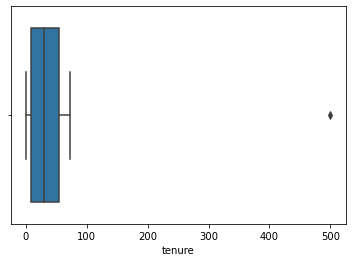

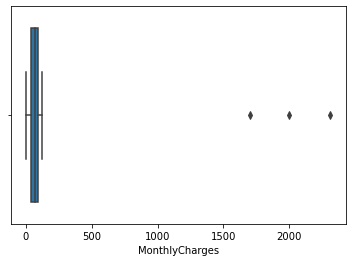

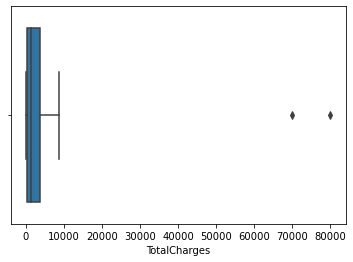

In [10]:
print('Distribution of data before handled by Outlier: \n')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

### Handling Outlier
After we know which variables that have outliers, handle it using the interquartile range (IQR) method.

Maximum value for each columns is: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Minimum value for each columns is: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

Distribution of data after handled by Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


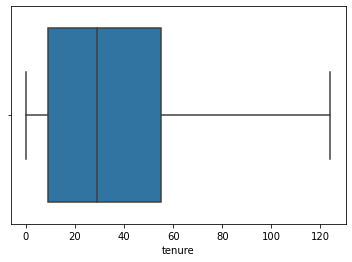

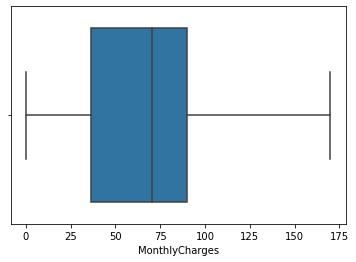

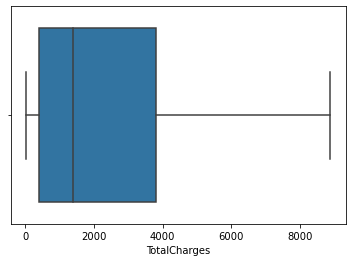

In [11]:
# Handling with IQR
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Maximum value for each columns is: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nMinimum value for each columns is: ')
print(minimum)

df_load['tenure'].mask(df_load['tenure'] > maximum['tenure'], maximum['tenure'], inplace = True)
df_load['MonthlyCharges'].mask(df_load['MonthlyCharges'] > maximum['MonthlyCharges'], maximum['MonthlyCharges'], inplace = True)
df_load['TotalCharges'].mask(df_load['TotalCharges'] > maximum['TotalCharges'], maximum['TotalCharges'], inplace = True)

print('\nDistribution of data after handled by Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

### Summary
From the three boxplots with the variable 'tenure', 'MonthlyCharges' & 'TotalCharges' we can look that there are outliers. This can be identified from the points that far away from the boxplot.

Then the outlier value is handled by changing that value to the Maximum & Minimum value of the interquartile range (IQR). After handling the outliers, and looking at the details of the data, there are no outlier values.

## Standardize Values
### Detecting non standard value
Detecting whether there are values from non-standard categorical variables. Usually this cases occurs because data entry mistakes. The difference of term is one of the factors, so we need to standardize the data.

In [12]:
# Input variable
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):

    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0mVariable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count Before Standardized Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Before Stand

### Standardized categorical variable
After we know which variables that have non-standard values, then we have to standardize it with the most values term, without changing the meaning. Example: Iya -> Yes. Then look again the unique values of each variable that has been changed.

In [13]:
df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

# input variable
for col_name in list(['gender','Dependents','Churn']):
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


### Summary
We can see that there are some non-standard variables. These variables are:
- Gender (Female, Male, Wanita, Laki-Laki), which can be standardized become (Female, Male).
- Dependents (Yes, No, Iya), can be standardized become(Yes, No).
- Churn (Yes, No, Churn), can be standardized become(Yes, No).

After we standardize the values, now dataset ready to use.